In [33]:
import wave 
import array 
import librosa
import soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

### **[ 필요 함수 정의 ]**
1. 사인파 생성 함수
2. 파형 시각화 함수
3. 주파수 영역 시각화 함수

In [34]:
## 사인파 생성 함수
def generate_sinewave(
    frequency: int = 10,   
    amplitude: int = 1,   
    duration: int = 1,        
    sample_rate: int = 44100, 
    phase: int = 0):

    t = np.linspace(0, duration, int(sample_rate * duration))

    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase)

    if t is None:
        t = np.array(len(sine_wave)) / sample_rate
    
    return sine_wave

# 파형 시각화 함수
def generate_waveform(waveform, sample_rate, t=None):
    if t is None:
        t = np.arange(len(waveform)) / sample_rate

    plt.figure(figsize=(7,2))
    plt.plot(t, waveform)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()

In [35]:
## 주파수 영역 시각화 함수
def frequency_plot(signal_fft, sample_rate:int):
    # 주파수 축 값 정의
    frequencies = np.fft.fftfreq(len(signal_fft), 1/sample_rate) # .fft.fftfreq: frequency bins을 반환

    # 주파수 영역 시각화
    plt.figure(figsize=(7, 2))
    plt.plot(frequencies, np.abs(signal_fft))
    plt.title('Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

FFT signal Data Type :  complex128
FFT signal's shape :  (88200,)
[-3.92148120e-12+0.j          4.04587048e-08-0.00113598j
  1.61849252e-07-0.00227197j  3.64162912e-07-0.00340798j
  6.47413933e-07-0.00454401j]


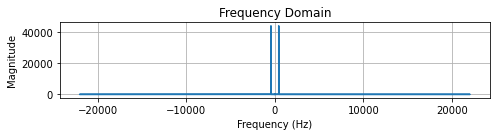

In [27]:
## TEST
# 사인파 생성
sample_rate = 44100
signal = generate_sinewave(frequency=440, sample_rate=sample_rate, duration=2)

# FFT 변환
signal_fft = np.fft.fft(signal)
print("FFT signal Data Type : ",signal_fft.dtype)
print("FFT signal's shape : " , signal_fft.shape)
print(signal_fft[:5])

# # 확인
# generate_waveform(signal[:4000], sample_rate)

# 주파수 영역 확인
frequency_plot(signal_fft, sample_rate)

### **오디오 분석**

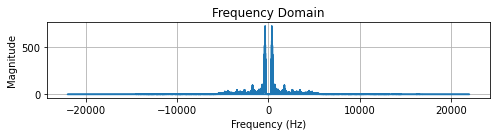

In [32]:
# load할 Audio의 정보 확인
f = wave.open("freesound_laugh.wav")
_, _, sr, _ = f.getparams()[:4] # sr : 44100

# librosa로 Audio 불러오기
audio, sample_rate = librosa.load("freesound_laugh.wav", sr = sr, mono = True)

# FFT 변환
audio_fft = np.fft.fft(audio)

# 주파수 축
frequency_plot(audio_fft, sample_rate)

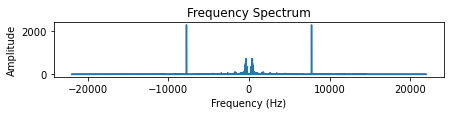

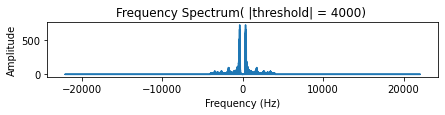

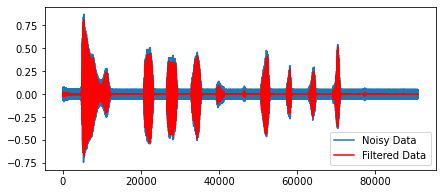

In [45]:
## Low pass filter 적용

# 사인파 생성
freq = 16000
t = np.linspace(0, 1, len(audio), endpoint=False)
sin_form = np.sin(2 * np.pi * freq * t)

# noise 추가
noisyaudio = audio + 0.05 * sin_form

# FFT
fft_signal = np.fft.fft(noisyaudio)
frequency = np.fft.fftfreq(len(noisyaudio), d=1/sample_rate)

# 시각화 : 초기 상태
plt.figure(figsize=(7, 1))
plt.plot(frequency, np.abs(fft_signal))
plt.xlabel('Frequency (Hz)')  # x축 레이블
plt.ylabel('Amplitude')       # y축 레이블
plt.title('Frequency Spectrum')  # 그래프 제목
plt.show()


# 시각화 : frequency에 cutoff 추가 >> cutoff_freq 미만의 영역만 통과
cutoff_freq = 4000 
fft_signal[np.abs(frequency) > cutoff_freq] = 0 # 모두 0 처리
plt.figure(figsize=(7, 1))
plt.plot(frequency, np.abs(fft_signal))
plt.xlabel('Frequency (Hz)')  # x축 레이블
plt.ylabel('Amplitude')       # y축 레이블
plt.title('Frequency Spectrum( |threshold| = 4000) ')  # 그래프 제목
plt.show()

# 시각화 : Time Domain으로 복원
filtered_data = np.real(np.fft.ifft(fft_signal)) # 실수 부분만 추출
plt.figure(figsize=(7, 3))
plt.plot(noisyaudio, label='Noisy Data')
plt.plot(filtered_data, label='Filtered Data', color='red')
plt.legend()
plt.show()

# Audio 확인
display(Audio(noisyaudio, rate=16000))
display(Audio(filtered_data, rate=16000))

### **오디오 특징 추출**
- 1st. spectrogram
- 2nd. Mel-spectrogram
- 3rd. MFCC

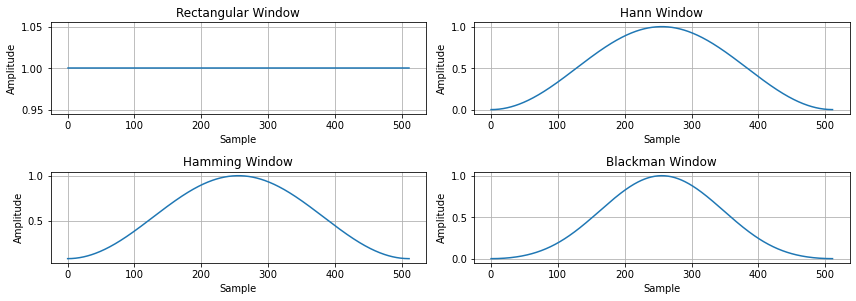

In [49]:
# window 확인
N = 512
windows = {
    'Rectangular': np.ones(N),
    'Hann': np.hanning(N),
    'Hamming': np.hamming(N),
    'Blackman': np.blackman(N)}

plt.figure(figsize=(12, 8))
for i, (name, window) in enumerate(windows.items(), 1):
    plt.subplot(4, 2, i)
    plt.plot(window)
    plt.title(f'{name} Window')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()

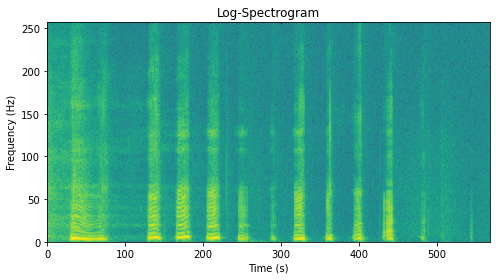

In [63]:
## Spectrogram 확인
audio_stft = librosa.stft(audio, n_fft=512, hop_length=160, win_length=512, window="hann")
# audio_stft = librosa.stft(audio, n_fft=1024, hop_length=160, win_length=512, window="ham")

# Magnitude 계산
audio_magn = np.abs(audio_stft)

# 시각화
plt.figure(figsize=(7, 4))
plt.pcolormesh(np.log(audio_magn)) # log : 차이가 명확
plt.title('Log-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

<ipython-input-66-4ebe9f39da31>:6: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(audio_mel)) # log : 차이가 명확


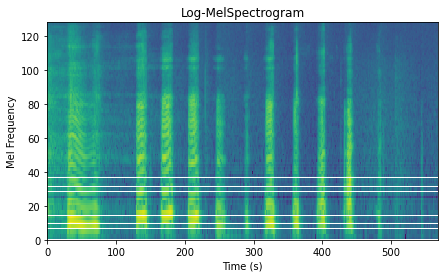

In [66]:
## Mel-spectrogram : mel scale 확인
audio_mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, n_fft=512, hop_length=160, win_length=512)

# 시각화
plt.figure(figsize=(7, 4))
plt.pcolormesh(np.log(audio_mel)) # log : 차이가 명확
plt.title('Log-MelSpectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()


<ipython-input-75-8fc45e4e529c>:8: RuntimeWarning: divide by zero encountered in log
  np.log(np.abs(audio_mfcc)), shading='auto') # log : 차이가 명확


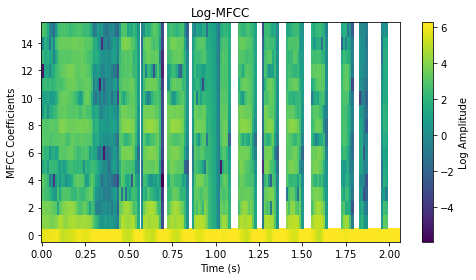

In [75]:
## MFCC 추출
audio_mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=16)

# 시각화
plt.figure(figsize=(7, 4))
plt.pcolormesh(librosa.times_like(audio_mfcc, sr=sr), 
               np.arange(audio_mfcc.shape[0]), 
               np.log(np.abs(audio_mfcc)), shading='auto') # log : 차이가 명확
plt.title('Log-MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.colorbar(label='Log Amplitude')
plt.tight_layout()
plt.show()